In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from nltk.tokenize import word_tokenize


Let's get started by reading in the dataset!

In [3]:
df = pd.read_csv('/Users/kaoliver/Downloads/judge-1377884607_tweet_product_company.csv', encoding='mac-roman')

In [4]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


Eesh, looks like we're gonna need to clean this up. But first, lets get some more info. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [6]:
df.dtypes

tweet_text                                            object
emotion_in_tweet_is_directed_at                       object
is_there_an_emotion_directed_at_a_brand_or_product    object
dtype: object

In [7]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


First things first, I hate how long the column names are. Let's rename them. 

In [20]:
df =df.rename(columns={'emotion_in_tweet_is_directed_at': 'company',
                       'is_there_an_emotion_directed_at_a_brand_or_product' : 'emotion'})

In [23]:
df.head()

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


Much better. Now let's explore. 

In [8]:
df.shape

(9093, 3)

In [24]:
df['company'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [25]:

df['emotion'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [26]:
df['company'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: company, dtype: int64

In [27]:
df['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [29]:
df['company'].isna().sum()

5802

In [30]:
df['emotion'].isna().sum()

0

In [12]:
df['tweet_text'].isna().sum()

1

<AxesSubplot:ylabel='emotion'>

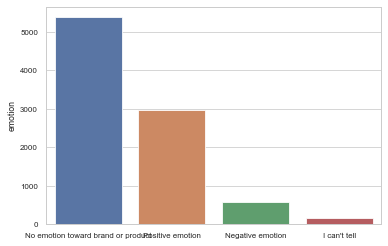

In [31]:

sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=0.9)  
sns.barplot(x=df['emotion'].value_counts().index, 
            y=df['emotion'].value_counts())

<AxesSubplot:ylabel='emotion'>

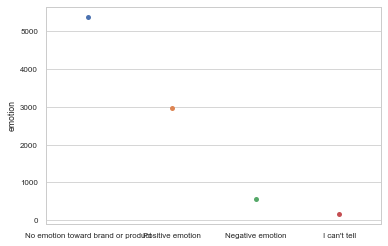

In [32]:
sns.swarmplot(x=df['emotion'].value_counts().index, 
               y=df['emotion'].value_counts())

Alright, since I wanna start with a binary classifier, 
we need to get rid of everything besides positive and negative. 
This is gonna make the data set much smaller, but we can always 
go back and add stuff back in if we have time. (I didn't have time)

In [36]:
new_df =  df[df.emotion != "I can't tell"]

In [37]:
new_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [45]:
third_df = new_df[new_df.emotion != 'No emotion toward brand or product']

In [50]:
third_df.head()

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


That should do it. Let's make a graph to see what we're working with. 

<AxesSubplot:ylabel='emotion'>

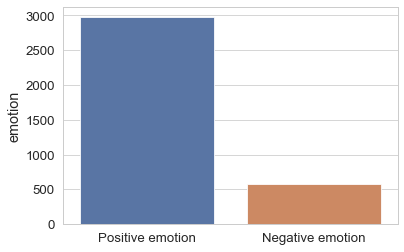

In [49]:
sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=1.5)  
sns.barplot(x=third_df['emotion'].value_counts().index, 
            y=third_df['emotion'].value_counts())


In [48]:
third_df['emotion'].value_counts()

Positive emotion    2978
Negative emotion     570
Name: emotion, dtype: int64

As you can see, there is a substantial class imbalance. We're not gonna worry about that now though. 
Let's clean up the company column. 

In [51]:
third_df['company'].value_counts()

iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Android App                         80
Android                             77
Other Apple product or service      34
Name: company, dtype: int64

<AxesSubplot:ylabel='company'>

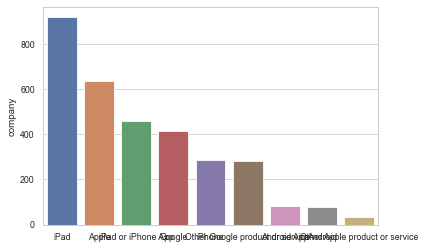

In [54]:
sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=1)  
sns.barplot(x=third_df['company'].value_counts().index, 
            y=third_df['company'].value_counts())


Our only interest is in tweets directed at Apple and Google, so we can punt the 
Android tweets. 

In [57]:
fourth_df = third_df[third_df.company != 'Android App']

In [58]:
fourth_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [59]:
fifth_df = fourth_df[fourth_df.company != 'Android']

In [60]:
fifth_df

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9077,@mention your PR guy just convinced me to swit...,iPhone,Positive emotion
9079,&quot;papyrus...sort of like the ipad&quot; - ...,iPad,Positive emotion
9080,Diller says Google TV &quot;might be run over ...,Other Google product or service,Negative emotion
9085,I've always used Camera+ for my iPhone b/c it ...,iPad or iPhone App,Positive emotion


In [62]:
fifth_df['company'].value_counts()

iPad                               918
Apple                              638
iPad or iPhone App                 460
Google                             414
iPhone                             287
Other Google product or service    283
Other Apple product or service      34
Name: company, dtype: int64

Once again, we need to make this easy on ourselves. I'm thinking we combine everything into two
simple categories: "Apple" and "Google"

In [63]:
fifth_df['company'] = fifth_df['company'].replace(['iPad'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
fifth_df['company'].value_counts()

Apple                              1556
iPad or iPhone App                  460
Google                              414
iPhone                              287
Other Google product or service     283
Other Apple product or service       34
Name: company, dtype: int64

In [65]:
fifth_df['company'] = fifth_df['company'].replace(['iPad or iPhone App'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [66]:
fifth_df['company'] = fifth_df['company'].replace(['Other Apple product or service'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [67]:
fifth_df['company'] = fifth_df['company'].replace(['iPhone'], 'Apple')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
fifth_df['company'] = fifth_df['company'].replace(['Other Google product or service'], 'Google')

/opt/anaconda3/envs/twitter/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
fifth_df['company'].value_counts()

Apple     2337
Google     697
Name: company, dtype: int64

In [70]:
fifth_df['emotion'].value_counts()

Positive emotion    2837
Negative emotion     554
Name: emotion, dtype: int64

In [73]:
fifth_df.head()

,tweet_text,company,emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Apple,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Apple,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Apple,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Apple,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


That should do the trick! Let's get it up on a graph. 

<AxesSubplot:ylabel='company'>

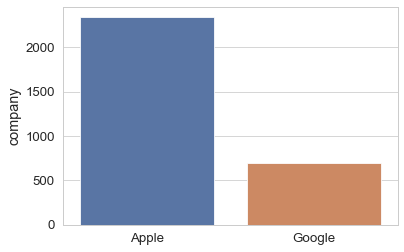

In [75]:
sns.set(style='whitegrid', rc={"grid.linewidth": 3.5})
sns.set_context("paper", font_scale=1.5)  
sns.barplot(x=fifth_df['company'].value_counts().index, 
            y=fifth_df['company'].value_counts())

Ah, much better isn't it? So now that we've cleaned up the company and emotion columns, 
we can move on to the vaunted tweet_text column and really get frisky with the NLP. Let's save the data frame and go to another notebook though, this one is getting a little long.

In [79]:
fifth_df.to_csv(index=False)

compression_opts = dict(method='zip',
                        archive_name='out.csv')  
fifth_df.to_csv('out.zip', index=False,
          compression=compression_opts)  


FileNotFoundError: [Errno 2] No such file or directory: './pickles/fifth_df.p'